# Covid19 Analysis

# 1. Show the number of Confirmed, Deaths and Recovered cases in each Region.

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

covid = pd.read_csv('covid19_data.csv')

In [2]:
covid.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [48]:
covid.head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [4]:
covid.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


# 2. Remove all the records where the Confirmed Cases is Less Than 10.

In [5]:
covid = covid[covid['Confirmed'] >= 10]

# 3. In which Region, maximum number of Confirmed cases were recorded ?

In [35]:
confirmed_case_per_region = covid.groupby('Region')['Confirmed'].sum().sort_values(ascending=False)
confirmed_case_per_region

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Suriname           10
Gambia             10
Holy See           10
Name: Confirmed, Length: 180, dtype: int64

In [36]:
confirmed_case_per_region.index[0]

'US'

# 4. In which Region, minimum number of Deaths cases were recorded? Find total countries with those number of deaths.

In [37]:
deaths_case_per_region = covid.groupby('Region')['Deaths'].sum().sort_values(ascending=True)
deaths_case_per_region

Region
Cambodia                        0
Seychelles                      0
Saint Lucia                     0
Central African Republic        0
Saint Kitts and Nevis           0
                            ...  
France                      24121
Spain                       24275
UK                          26165
Italy                       27682
US                          60967
Name: Deaths, Length: 180, dtype: int64

In [34]:
type(deaths_case_per_region)

pandas.core.series.Series

In [44]:
zero_deaths_countries = deaths_case_per_region.reset_index()
zero_deaths_countries = zero_deaths_countries[zero_deaths_countries['Deaths'] == 0]
zero_deaths_countries

,Region,Deaths
0,Cambodia,0
1,Seychelles,0
2,Saint Lucia,0
3,Central African Republic,0
4,Saint Kitts and Nevis,0
5,South Sudan,0
6,Rwanda,0
7,Grenada,0
8,Macau,0
9,Madagascar,0


In [45]:
print(zero_deaths_countries['Region'].count())

23


In [47]:
print(list(zero_deaths_countries['Region']))

['Cambodia', 'Seychelles', 'Saint Lucia', 'Central African Republic', 'Saint Kitts and Nevis', 'South Sudan', 'Rwanda', 'Grenada', 'Macau', 'Madagascar', 'Nepal', 'Namibia', 'Saint Vincent and the Grenadines', 'Mozambique', 'Holy See', 'Timor-Leste', 'Mongolia', 'Uganda', 'Laos', 'Eritrea', 'Vietnam', 'Fiji', 'Dominica']


# 5. How many Confirmed, Deaths & Recovered cases were reported from Indonesia & India until 29 April 2020?

In [49]:
covid['Date'] = pd.to_datetime(covid['Date'])

In [50]:
covid

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,2020-04-29,Wyoming,US,545,7,0
317,2020-04-29,Xinjiang,Mainland China,76,3,73
318,2020-04-29,Yukon,Canada,11,0,0
319,2020-04-29,Yunnan,Mainland China,185,2,181


In [57]:
indonesia_india = covid[(covid['Region'] == 'Indonesia') | (covid['Region'] == 'India')]
indonesia_india[['Region', 'Confirmed', 'Deaths', 'Recovered']]

,Region,Confirmed,Deaths,Recovered
74,India,33062,1079,8437
75,Indonesia,9771,784,1391


# 6. Sort the entire data wrt numbers of Confirmed cases in ascending order.

In [63]:
sorted_confirmed = covid.sort_values(by=['Confirmed'], ascending=True)

In [64]:
sorted_confirmed

,Date,State,Region,Confirmed,Deaths,Recovered
156,2020-04-29,NaN,Suriname,10,1,8
70,2020-04-29,NaN,Holy See,10,0,2
59,2020-04-29,NaN,Gambia,10,1,8
318,2020-04-29,Yukon,Canada,11,0,0
217,2020-04-29,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,2020-04-29,NaN,France,165093,24087,48228
168,2020-04-29,NaN,UK,165221,26097,0
80,2020-04-29,NaN,Italy,203591,27682,71252
153,2020-04-29,NaN,Spain,236899,24275,132929


# 7. Sort the entire data wrt numbers of Recovered cases in descending order.

In [65]:
sorted_recovered = covid.sort_values(by=['Recovered'], ascending=False)

In [66]:
sorted_recovered

,Date,State,Region,Confirmed,Deaths,Recovered
153,2020-04-29,NaN,Spain,236899,24275,132929
61,2020-04-29,NaN,Germany,161539,6467,120400
76,2020-04-29,NaN,Iran,93657,5957,73791
80,2020-04-29,NaN,Italy,203591,27682,71252
229,2020-04-29,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,2020-04-29,Nevada,US,4934,230,0
257,2020-04-29,Nebraska,US,3851,56,0
255,2020-04-29,Montana,US,451,16,0
254,2020-04-29,Missouri,US,7660,338,0


# 8. Make a bar graph of the amount of Confirmed cases in every region in China

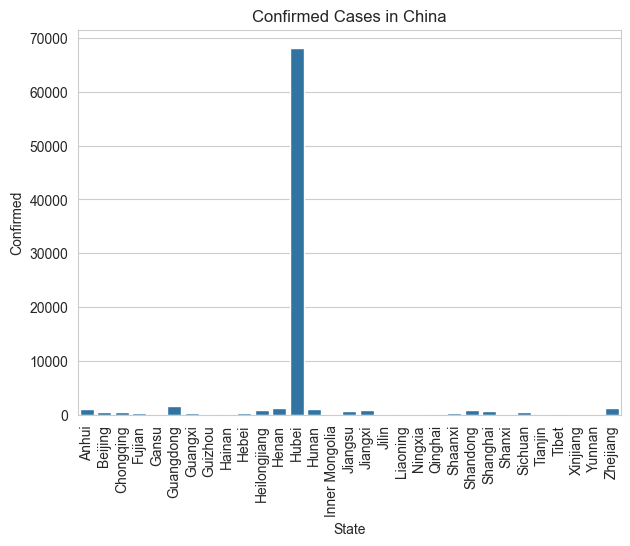

In [85]:
china_confirmed = covid[covid['Region'] == 'Mainland China']

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x='State', y='Confirmed', data=china_confirmed, ax=ax)
plt.xticks(rotation=90)
ax.set_title('Confirmed Cases in China')

plt.show()